In [31]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import sys
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
int_dir = os.path.join(proj_dir,'data','analysis','interim')
src_dir = os.path.join(proj_dir,'src')
fig_dir = os.path.join(proj_dir,'reports','devel','figures')

In [20]:
grd_path = os.path.join(data_dir,'interim','grd4_dV.nc')
grd = xr.open_dataset(grd_path)

ssflux_path = os.path.join(data_dir,'raw','scratch','waom4_Tsur','ocean_avg_0010.nc')
ssflux = xr.open_dataset(ssflux_path).ssflux[5:8].mean('ocean_time')

/home/ubuntu/bigStick/anaconda3/envs/xesmf_env/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


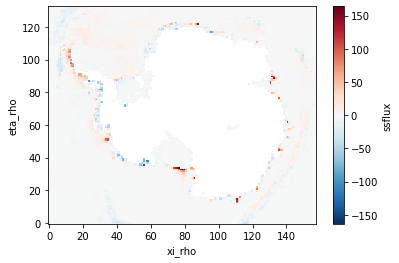

In [21]:
s2season = 90*24*3600
rho = 1027
g2kg = 1/1000
(ssflux*s2season*rho*g2kg)[::10,::10].plot()

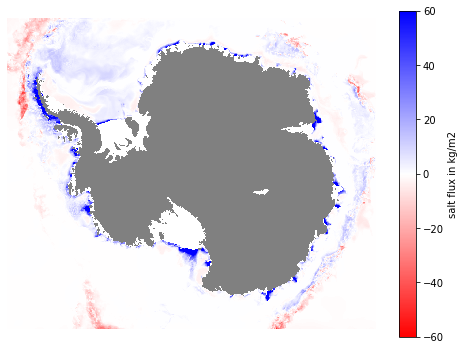

In [32]:
fig,ax = plt.subplots(figsize=(8.27,6))

cmap = colors.ListedColormap(['gray','white'])  
ax.pcolormesh(grd.mask_rho,cmap=cmap)
img = (ssflux*s2season*rho*g2kg).where(grd.zice==0).plot(ax=ax,add_colorbar=False,vmin=-60,vmax=60,cmap="bwr_r")
plt.colorbar(img,ax=ax,label='salt flux in kg/m2')
ax.set_aspect('equal')
ax.axis('off')

out_path = os.path.join(fig_dir,'salt_flux.png')
fig.savefig(out_path,format='png',dpi=300,bbox_inches = "tight")

plt.show()